In [1]:
%cd ..

d:\autograde


# Load data

In [2]:
testset1_path = "data\\testset1\images"

In [3]:
# make sure the testset1_path is correct
import os
assert os.path.exists(testset1_path)

In [4]:
import pandas as pd 
file_names = [file for file in os.listdir(testset1_path) if os.path.isfile(os.path.join(testset1_path, file))]

test_df = pd.DataFrame(file_names, columns=["image_name"]) 

In [5]:
test_df

,image_name
0,IMG_3960_iter_0.jpg
1,IMG_3960_iter_1.jpg
2,IMG_3960_iter_10.jpg
3,IMG_3960_iter_100.jpg
4,IMG_3960_iter_101.jpg
...,...
1975,z6020062307339_f2abaff0550ac8af6e8e586aacd473c...
1976,z6020062307339_f2abaff0550ac8af6e8e586aacd473c...
1977,z6020062307339_f2abaff0550ac8af6e8e586aacd473c...
1978,z6020062307339_f2abaff0550ac8af6e8e586aacd473c...


In [6]:
# save it to test/test1.csv
test_df.to_csv("test1/test1.csv", index = False) 

# Contour detection

In [7]:
import csv
import os 
if os.path.exists('data/pivots.csv'):
    # Load existing pivots
    pivots = []
    with open('data/pivots.csv', 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            pivots.append(tuple(map(int, row)))
        print("Loaded existing pivots.")


Loaded existing pivots.


In [9]:
import cv2
import os
import json
import matplotlib.pyplot as plt
from tqdm import tqdm
from data_engineering.pivot_contour import process_files

# Paths
image_folder = testset1_path
label_folder = None
save_log_path = "test/created/test_1_save_contours.json"
error_log_path = "test/created/test_1_error_contours.json"
save_contours_path = "test/created/contours"

# Process files
process_files(image_folder, label_folder, pivots, save_log_path, error_log_path,save_contours_path)

100%|██████████| 1980/1980 [04:26<00:00,  7.44it/s]


In [10]:
from data_engineering.pivot_contour import validate_contours_against_pivots_2
from data_engineering.pivot_contour import detect_black_squares

In [11]:
from data_engineering.pivot_contour import process_files_2
# Paths
error_file = "test/created/test_1_error_contours.json"
image_folder = testset1_path
save_contours_path = "test/created/contours"
save_log_path = "test/created/test_1_save_contours_2.json"
error_log_path = "test/created/test_1_error_contours_2.json"

# Rerun validation
process_files_2(error_file, image_folder, pivots, save_log_path, error_log_path, save_contours_path)

100%|██████████| 1980/1980 [04:38<00:00,  7.12it/s]


note: trolling

In [ ]:
from data_engineering.pivot_contour import process_files_3, detect_black_squares_3,show_sheet
# Paths
error_file = "test/created/test_1_error_contours_2.json"
image_folder = testset1_path
save_contours_path = "test/created/contours"
save_log_path = "test/created/test_1_save_contours_3.json"
error_log_path = "test/created/test_1_error_contours_3.json"

# Rerun validation
process_files_3(error_file, image_folder, pivots, save_log_path, error_log_path, save_contours_path)

In [23]:
full_error_log = json.load(open(error_log_path))
# count how many prefix [:8]
error_log = [x[:8] for x in full_error_log]
# create df for error log and full error log
df_error = pd.DataFrame(error_log, columns=["image_name"])
df_error["error"] = full_error_log

In [17]:
def draw_contour_pivot(image, contours, pivots):
    for pivot in pivots:
        x, y, w, h = pivot
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangles

    for contour in contours:
        cv2.drawContours(image, [contour], -1, (255, 0, 0), 2)  # Red contours

    show_sheet(image)

In [54]:
df_error

,image_name,error
0,IMG_3960,IMG_3960_iter_0.jpg
1,IMG_3960,IMG_3960_iter_1.jpg
2,IMG_3960,IMG_3960_iter_10.jpg
3,IMG_3960,IMG_3960_iter_100.jpg
4,IMG_3960,IMG_3960_iter_101.jpg
...,...,...
882,z6020062,z6020062307339_f2abaff0550ac8af6e8e586aacd473c...
883,z6020062,z6020062307339_f2abaff0550ac8af6e8e586aacd473c...
884,z6020062,z6020062307339_f2abaff0550ac8af6e8e586aacd473c...
885,z6020062,z6020062307339_f2abaff0550ac8af6e8e586aacd473c...


In [56]:
df_error.image_name.value_counts()

image_name
IMG_3960    220
IMG_3975    220
IMG_3967    163
z6020062    154
IMG_3966     69
IMG_3968     61
Name: count, dtype: int64

## IMG_3960

In [32]:
df_3960 = df_error[df_error["image_name"].str.contains("3960")]

In [34]:
df_3960

,image_name,error
0,IMG_3960,IMG_3960_iter_0.jpg
1,IMG_3960,IMG_3960_iter_1.jpg
2,IMG_3960,IMG_3960_iter_10.jpg
3,IMG_3960,IMG_3960_iter_100.jpg
4,IMG_3960,IMG_3960_iter_101.jpg
...,...,...
215,IMG_3960,IMG_3960_iter_95.jpg
216,IMG_3960,IMG_3960_iter_96.jpg
217,IMG_3960,IMG_3960_iter_97.jpg
218,IMG_3960,IMG_3960_iter_98.jpg


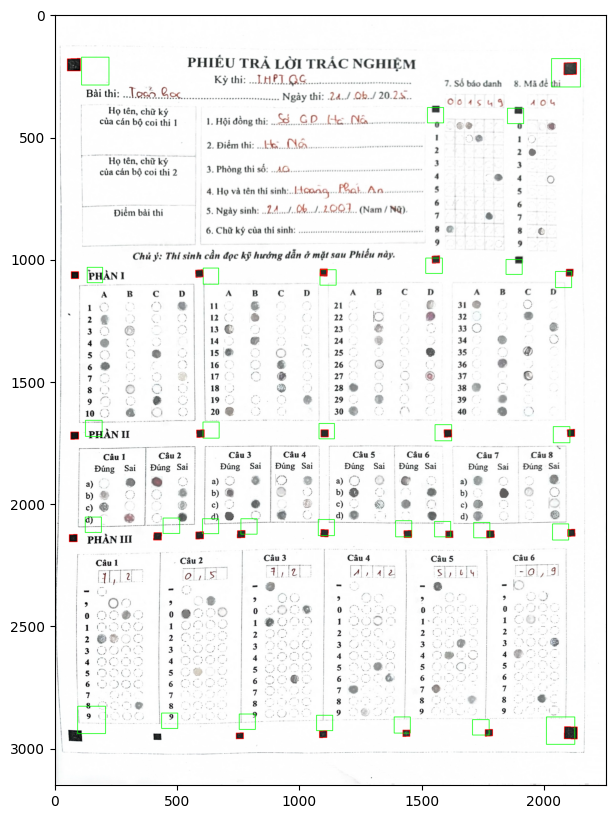

In [38]:
from data_engineering.pivot_contour import detect_black_squares_2,detect_black_squares
id = 0
img, squares = detect_black_squares_3(f"{image_folder}/{df_3960.error[id]}")
# check,valid_contours = validate_contours_against_pivots_2(squares, pivots, iou_threshold=0.05)
check,valid_contours = len(squares) == 31, squares
if(check): print("ok")
draw_contour_pivot(img, valid_contours, pivots)

In [152]:
import cv2
import os
import json
import matplotlib.pyplot as plt

def draw_bounding_boxes_from_json(
    image_path, 
    json_path, 
    output_image_path=None, 
    display=True, 
    box_color=(0, 255, 0),  # Default color: Green
    thickness=2,
    text_color=(255, 0, 0),  # Default text color: White
    font_scale=4,
    font_thickness=1
):
    """
    Draws bounding boxes on an image based on coordinates provided in a JSON file.
    Each bounding box is labeled with its index number.
    
    Parameters:
    - image_path (str): Path to the input image.
    - json_path (str): Path to the JSON file containing bounding box coordinates.
    - output_image_path (str, optional): Path to save the annotated image. If None, the image won't be saved.
    - display (bool, optional): Whether to display the annotated image. Default is True.
    - box_color (tuple, optional): BGR color tuple for the bounding boxes. Default is green (0, 255, 0).
    - thickness (int, optional): Thickness of the bounding box lines. Default is 4.
    - text_color (tuple, optional): BGR color tuple for the index text. Default is white (255, 255, 255).
    - font_scale (float, optional): Font scale for the index text. Default is 0.6.
    - font_thickness (int, optional): Thickness of the index text. Default is 2.
    """
    
    # Check if image exists
    if not os.path.exists(image_path):
        print(f"Error: Image file '{image_path}' does not exist.")
        return
    
    # Check if JSON file exists
    if not os.path.exists(json_path):
        print(f"Error: JSON file '{json_path}' does not exist.")
        return
    
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image '{image_path}'.")
        return
    
    image_height, image_width = image.shape[:2]
    
    # Load the JSON file
    try:
        with open(json_path, 'r') as f:
            boxes = json.load(f)
    except json.JSONDecodeError:
        print(f"Error: JSON file '{json_path}' is not properly formatted.")
        return
    
    # Ensure boxes is a list of lists
    if not isinstance(boxes, list) or not all(isinstance(box, list) and len(box) == 4 for box in boxes):
        print(f"Error: JSON file '{json_path}' does not contain a list of [x, y, w, h] bounding boxes.")
        return
    
    # Iterate through each bounding box and draw it on the image
    for idx, box in enumerate(boxes, start=1):
        try:
            x, y, w, h = box
        except ValueError:
            print(f"Warning: Box {idx} does not have exactly four elements. Skipping this box.")
            continue
        
        # Validate coordinates
        if not (isinstance(x, int) and isinstance(y, int) and isinstance(w, int) and isinstance(h, int)):
            print(f"Warning: Box {idx} has non-integer values. Skipping this box.")
            continue
        
        # Ensure the box is within image boundaries
        x = max(0, min(x, image_width - 1))
        y = max(0, min(y, image_height - 1))
        w = max(1, min(w, image_width - x))
        h = max(1, min(h, image_height - y))
        
        # Define top-left and bottom-right points
        top_left = (x, y)
        bottom_right = (x + w, y + h)
        
        # Draw the rectangle
        cv2.rectangle(image, top_left, bottom_right, box_color, thickness)
        
        # Prepare the index label
        label = str(idx)
        
        # Determine the position for the label
        label_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
        label_x = x
        label_y = y - 10 if y - 10 > 10 else y + 10  # Adjust position if too close to top
        
        # Draw a filled rectangle behind the text for better visibility
        cv2.rectangle(image, 
                      (label_x, label_y - label_size[1] - 5), 
                      (label_x + label_size[0] + 5, label_y + 5), 
                      box_color, 
                      cv2.FILLED)
        
        # Put the text label on the image
        cv2.putText(image, label, 
                    (label_x + 2, label_y - 2), 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    font_scale, 
                    text_color, 
                    font_thickness, 
                    cv2.LINE_AA)
    
    # Save the annotated image if an output path is provided
    if output_image_path:
        cv2.imwrite(output_image_path, image)
    
    # Display the annotated image if required
    if display:
        # Convert BGR to RGB for displaying with matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(12, 8))
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title(f"Annotated Image: {os.path.basename(image_path)}")
        plt.show()


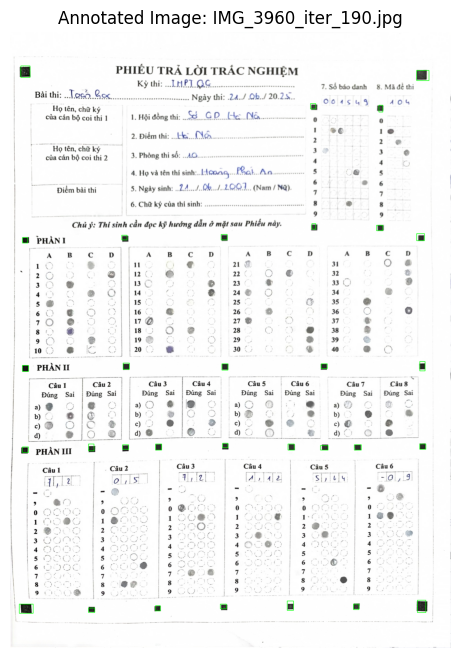

In [124]:
import os

# Define the paths
images_folder = "data/testset1/images"
json_folder = "test/manual_bbox"
image_filename = "IMG_3960_iter_190.jpg"
json_filename = "IMG_3960.json"
image_path = os.path.join(images_folder, image_filename)
json_path = os.path.join(json_folder, json_filename)
output_image_path = os.path.join(json_folder, f"annotated_{image_filename}")

# Call the function
draw_bounding_boxes_from_json(
    image_path=image_path,
    json_path=json_path,
    output_image_path=None,  # Set to None if you don't want to save
    display=True,  # Set to False if you don't want to display
    box_color=(0, 255, 0),  # Green boxes
    thickness=2
)

In [175]:
contours_3960_path = "IMG_3960.json"
json_folder = "test/manual_bbox"
contours_3960 = json.load(open(os.path.join(json_folder, contours_3960_path)))
for error in df_3960.error:
    # create [error with out jpg]_contours.json
    # the content = contours_3960
    with open(f"test/created/contours/{error[:-4]}_contours.json", "w") as f:
        json.dump(contours_3960, f)

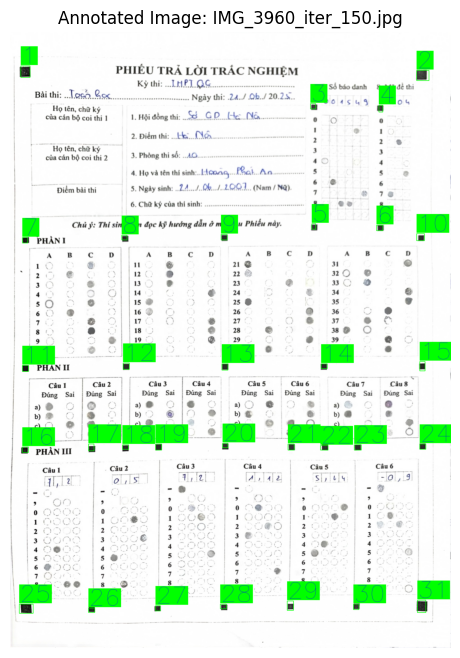

In [176]:
import os

# Define the paths
images_folder = "data/testset1/images"
json_folder = "test/created/contours/"
image_filename = "IMG_3960_iter_150.jpg"
json_filename = "IMG_3960_iter_150_contours.json"
image_path = os.path.join(images_folder, image_filename)
json_path = os.path.join(json_folder, json_filename)
output_image_path = os.path.join(json_folder, f"annotated_{image_filename}")

# Call the function
draw_bounding_boxes_from_json(
    image_path=image_path,
    json_path=json_path,
    output_image_path=None,  # Set to None if you don't want to save
    display=True,  # Set to False if you don't want to display
    box_color=(0, 255, 0),  # Green boxes
    thickness=2
)

## IMG_3975

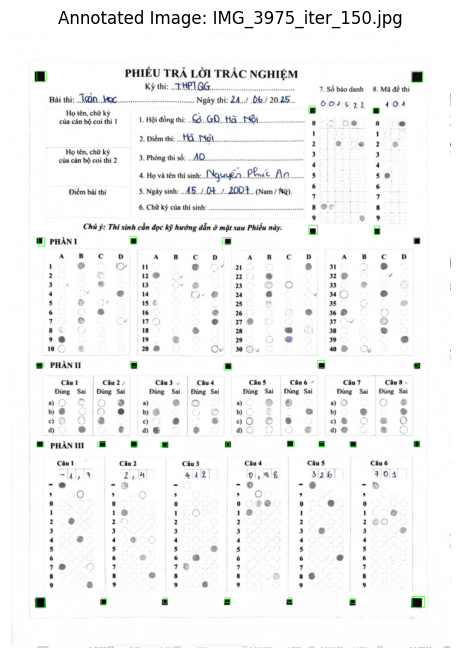

In [89]:
import os

# Define the paths
images_folder = "data/testset1/images"
json_folder = "test/manual_bbox"
image_filename = "IMG_3975_iter_150.jpg"
json_filename = "IMG_3975.json"
image_path = os.path.join(images_folder, image_filename)
json_path = os.path.join(json_folder, json_filename)
output_image_path = os.path.join(json_folder, f"annotated_{image_filename}")

# Call the function
draw_bounding_boxes_from_json(
    image_path=image_path,
    json_path=json_path,
    output_image_path=None,  # Set to None if you don't want to save
    display=True,  # Set to False if you don't want to display
    box_color=(0, 255, 0),  # Green boxes
    thickness=2
)

In [94]:
df_3975 = df_error[df_error["image_name"].str.contains("3975")]
len(df_3975)

220

In [96]:
contours_3975_path = "IMG_3975.json"
json_folder = "test/manual_bbox"
contours_3975 = json.load(open(os.path.join(json_folder, contours_3975_path)))
for error in df_3975.error:
    # create [error with out jpg]_contours.json
    with open(f"test/created/contours/{error[:-4]}_contours.json", "w") as f:
        json.dump(contours_3975, f)

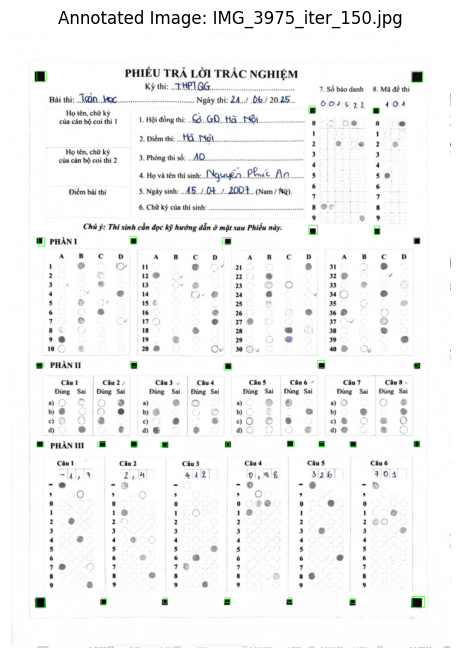

In [98]:
import os

# Define the paths
images_folder = "data/testset1/images"
json_folder = "test/created/contours/"
image_filename = "IMG_3975_iter_150.jpg"
json_filename = "IMG_3975_iter_150_contours.json"
image_path = os.path.join(images_folder, image_filename)
json_path = os.path.join(json_folder, json_filename)
output_image_path = os.path.join(json_folder, f"annotated_{image_filename}")

# Call the function
draw_bounding_boxes_from_json(
    image_path=image_path,
    json_path=json_path,
    output_image_path=None,  # Set to None if you don't want to save
    display=True,  # Set to False if you don't want to display
    box_color=(0, 255, 0),  # Green boxes
    thickness=2
)

## IMG_3967

In [90]:
df_3967 = df_error[df_error["image_name"].str.contains("3967")]

In [105]:
contours_3967_path = "IMG_3967_iter_54_contours.json"
json_folder = "test/created/contours/"
contours_3967 = json.load(open(os.path.join(json_folder, contours_3967_path)))
for error in df_3967.error:
    # create [error with out jpg]_contours.json
    with open(f"test/created/contours/{error[:-4]}_contours.json", "w") as f:
        json.dump(contours_3967, f)

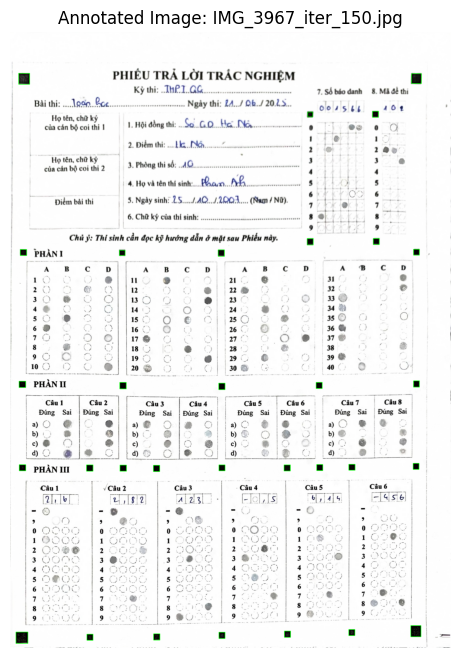

In [106]:
import os

# Define the paths
images_folder = "data/testset1/images"
json_folder = "test/created/contours/"
image_filename = "IMG_3967_iter_150.jpg"
json_filename = "IMG_3967_iter_150_contours.json"
image_path = os.path.join(images_folder, image_filename)
json_path = os.path.join(json_folder, json_filename)
output_image_path = os.path.join(json_folder, f"annotated_{image_filename}")

# Call the function
draw_bounding_boxes_from_json(
    image_path=image_path,
    json_path=json_path,
    output_image_path=None,  # Set to None if you don't want to save
    display=True,  # Set to False if you don't want to display
    box_color=(0, 255, 0),  # Green boxes
    thickness=2
)

## IMG_3966

In [102]:
df_3966 = df_error[df_error["image_name"].str.contains("3966")]

In [104]:
contours_3966_path = "IMG_3966_iter_186_contours.json"
json_folder = "test/created/contours/"
contours_3966 = json.load(open(os.path.join(json_folder, contours_3966_path)))
for error in df_3966.error:
    # create [error with out jpg]_contours.json
    with open(f"test/created/contours/{error[:-4]}_contours.json", "w") as f:
        json.dump(contours_3966, f)

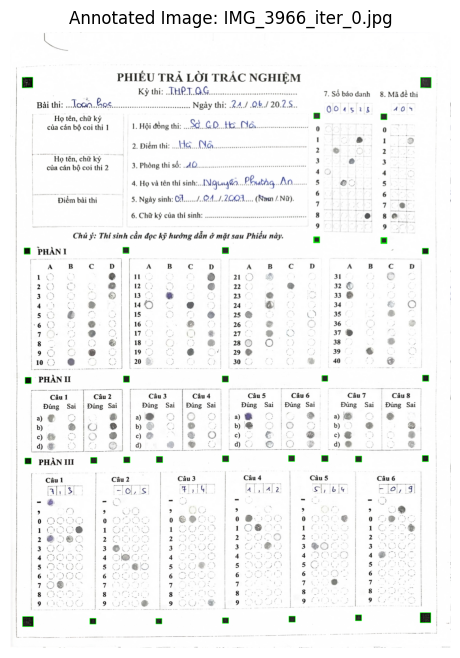

In [108]:
import os

# Define the paths
images_folder = "data/testset1/images"
json_folder = "test/created/contours/"
image_filename = "IMG_3966_iter_0.jpg"
json_filename = "IMG_3966_iter_0_contours.json"
image_path = os.path.join(images_folder, image_filename)
json_path = os.path.join(json_folder, json_filename)
output_image_path = os.path.join(json_folder, f"annotated_{image_filename}")

# Call the function
draw_bounding_boxes_from_json(
    image_path=image_path,
    json_path=json_path,
    output_image_path=None,  # Set to None if you don't want to save
    display=True,  # Set to False if you don't want to display
    box_color=(0, 255, 0),  # Green boxes
    thickness=2
)

## IMG_3968


In [109]:
df_3968 = df_error[df_error["image_name"].str.contains("3968")]

In [110]:
contours_3968_path = "IMG_3968_iter_0_contours.json"
json_folder = "test/created/contours/"
contours_3968 = json.load(open(os.path.join(json_folder, contours_3968_path)))
for error in df_3968.error:
    # create [error with out jpg]_contours.json
    with open(f"test/created/contours/{error[:-4]}_contours.json", "w") as f:
        json.dump(contours_3968, f)

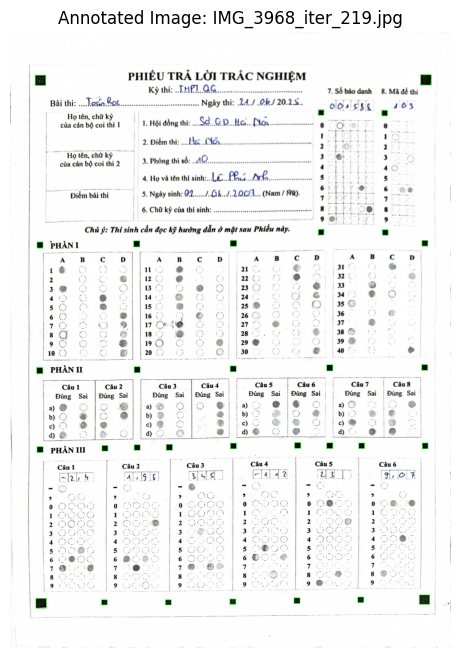

In [112]:
import os

# Define the paths
images_folder = "data/testset1/images"
json_folder = "test/created/contours/"
image_filename = "IMG_3968_iter_219.jpg"
json_filename = "IMG_3968_iter_219_contours.json"
image_path = os.path.join(images_folder, image_filename)
json_path = os.path.join(json_folder, json_filename)
output_image_path = os.path.join(json_folder, f"annotated_{image_filename}")

# Call the function
draw_bounding_boxes_from_json(
    image_path=image_path,
    json_path=json_path,
    output_image_path=None,  # Set to None if you don't want to save
    display=True,  # Set to False if you don't want to display
    box_color=(0, 255, 0),  # Green boxes
    thickness=2
)

## z6020062

In [113]:
df_z = df_error[df_error["image_name"].str.contains("z6020062")]

In [117]:
contours_z_path = "z6020062307339_f2abaff0550ac8af6e8e586aacd473c8_iter_2_contours.json"
json_folder = "test/created/contours/"
contours_z = json.load(open(os.path.join(json_folder, contours_z_path)))
for error in df_z.error:
    # create [error with out jpg]_contours.json
    with open(f"test/created/contours/{error[:-4]}_contours.json", "w") as f:
        json.dump(contours_z, f)

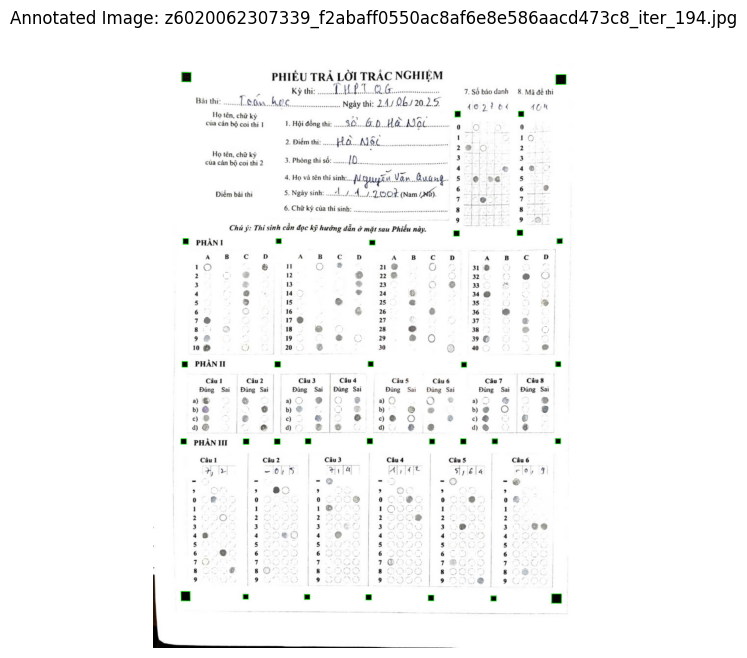

In [119]:
import os

# Define the paths
images_folder = "data/testset1/images"
json_folder = "test/created/contours/"
image_filename = "z6020062307339_f2abaff0550ac8af6e8e586aacd473c8_iter_194.jpg"
json_filename = "z6020062307339_f2abaff0550ac8af6e8e586aacd473c8_iter_194_contours.json"
image_path = os.path.join(images_folder, image_filename)
json_path = os.path.join(json_folder, json_filename)
output_image_path = os.path.join(json_folder, f"annotated_{image_filename}")

# Call the function
draw_bounding_boxes_from_json(
    image_path=image_path,
    json_path=json_path,
    output_image_path=None,  # Set to None if you don't want to save
    display=True,  # Set to False if you don't want to display
    box_color=(0, 255, 0),  # Green boxes
    thickness=2
)

## IMG_3966

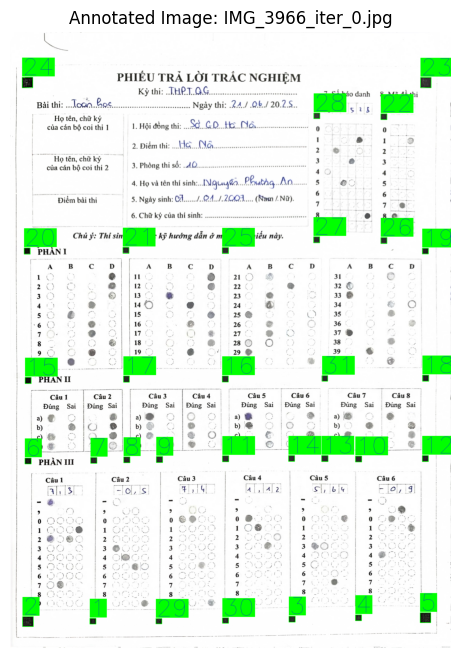

In [154]:
import os

# Define the paths
images_folder = "data/testset1/images"
json_folder = "test/created/contours/"
image_filename = "IMG_3966_iter_0.jpg"
json_filename = "IMG_3966_iter_0_contours.json"
image_path = os.path.join(images_folder, image_filename)
json_path = os.path.join(json_folder, json_filename)
output_image_path = os.path.join(json_folder, f"annotated_{image_filename}")

# Call the function
draw_bounding_boxes_from_json(
    image_path=image_path,
    json_path=json_path,
    output_image_path=None,  # Set to None if you don't want to save
    display=True,  # Set to False if you don't want to display
)

In [170]:
df_3966 = df_3960.copy()
df_3966['error'] = df_3966['error'].str.replace('IMG_3960', 'IMG_3966', regex=False)
df_3966['image_name'] = 'IMG_3966' + df_3966['image_name'].str[8:]

In [171]:
contours_3966_path = "IMG_3966_iter_0_contours.json"
json_folder = "test/created/contours/"
contours_3966 = json.load(open(os.path.join(json_folder, contours_3966_path)))
for error in df_3966.error:
    # create [error with out jpg]_contours.json
    with open(f"test/created/contours/{error[:-4]}_contours.json", "w") as f:
        json.dump(contours_3966, f)

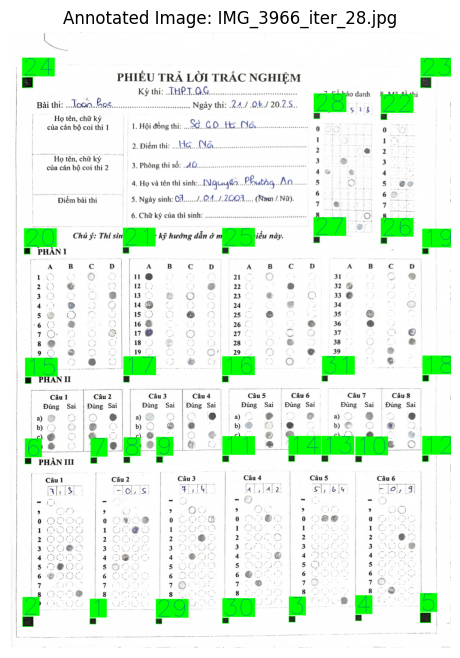

In [173]:
import os

# Define the paths
images_folder = "data/testset1/images"
json_folder = "test/created/contours/"
image_filename = "IMG_3966_iter_28.jpg"
json_filename = "IMG_3966_iter_28_contours.json"
image_path = os.path.join(images_folder, image_filename)
json_path = os.path.join(json_folder, json_filename)
output_image_path = os.path.join(json_folder, f"annotated_{image_filename}")

# Call the function
draw_bounding_boxes_from_json(
    image_path=image_path,
    json_path=json_path,
    output_image_path=None,  # Set to None if you don't want to save
    display=True,  # Set to False if you don't want to display
)

## Sorting

In [177]:
from data_engineering.sorting_contours import process_contour_files

# Example usage:
contours_dir = "test/created/contours"
output_dir = "test/created/sorted_contours"
RERUN_CONTOURS = True
DOUBLE_CHECK = True
if RERUN_CONTOURS and DOUBLE_CHECK:
    process_contour_files(contours_dir, output_dir)

100%|██████████| 1980/1980 [00:03<00:00, 576.14it/s]


# Cutting image

In [178]:
from data_engineering.cutting import read_sorted_contours, convert_sorted_contours_to_matrix, cut_image_based_on_matrix, create_cropped_labels, crop_instructions
def process_images_in_folder(image_folder, sorted_contours_folder, output_dir):
    """
    Processes all images in a folder, cuts them, creates cropped labels, and generates a CSV summary.

    Args:
        image_folder: Path to the folder containing original images.
        sorted_contours_folder: Path to the folder containing sorted contours files.
        output_dir: Base directory to save output (cropped images, labels, and CSV).
        crop_instructions: List of tuples defining the cropping logic.
    """

    cropped_image_dir = os.path.join(output_dir, "cropped_images")
    cropped_label_dir = os.path.join(output_dir, "cropped_labels")
    csv_path = os.path.join(output_dir, "preprocessed_cropped_data.csv")

    os.makedirs(cropped_image_dir, exist_ok=True)
    os.makedirs(cropped_label_dir, exist_ok=True)

    results = []

    for image_file in tqdm(os.listdir(image_folder)):
        if image_file.endswith(".jpg"):
            image_name = os.path.splitext(image_file)[0]
            image_path = os.path.join(image_folder, image_file)
            sorted_contours_path = os.path.join(sorted_contours_folder, f"{image_name}_contours_sorted.txt")

            if not os.path.exists(sorted_contours_path):
                print(f"Warning: Sorted contours file not found for {image_file}. Skipping.")
                continue

            # Read and convert sorted contours to matrix
            sorted_contours = read_sorted_contours(sorted_contours_path)
            if sorted_contours is None:
                print(f"Warning: Error reading or processing sorted contours for {image_file}. Skipping.")
                continue
            matrix = convert_sorted_contours_to_matrix(sorted_contours)

            # Cut the image based on the matrix and crop instructions
            cut_image_based_on_matrix(image_path, matrix, cropped_image_dir)

            # Collect information for, CSV
            for crop_name, _ in crop_instructions:
                cropped_label_file = os.path.join(cropped_label_dir, f"{image_name}_{crop_name}.txt")
                num_labels = 0
                if os.path.exists(cropped_label_file):
                    with open(cropped_label_file, 'r') as f:
                        num_labels = len(f.readlines())

                results.append({
                    "image_name": f"{image_name}_{crop_name}.jpg",
                    "org_name": image_file,
                    "type": crop_name,
                    "label_name": f"{image_name}_{crop_name}.txt",
                    "number_label": num_labels
                })

    # Create a Pandas DataFrame and save to CSV
    df = pd.DataFrame(results)
    df.to_csv(csv_path, index=False)
    print(f"CSV summary saved to: {csv_path}")


In [179]:
import os
import pandas as pd
import cv2
import numpy as np
from tqdm import tqdm

# Example Usage:
image_folder =  "data\\testset1\images"  # Folder containing original images
sorted_contours_folder = "test/created/sorted_contours"  # Folder containing sorted contours files
output_dir = "test/"  # Base output directory
RERUN = True
DOUBLE_CHECK = True
if RERUN and DOUBLE_CHECK:
    process_images_in_folder(image_folder, sorted_contours_folder, output_dir)

100%|██████████| 1980/1980 [04:52<00:00,  6.76it/s]


CSV summary saved to: test/preprocessed_cropped_data.csv
